### Run the notebook and it will produce all the figures in simulation part

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import glob
import os
import matplotlib.ticker as mtick
import numpy as np
from time import time
import math
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from KNN import KNN
from AWNN import AWNN 
from AKDE import AKDE
from sklearn.neighbors import KernelDensity

from AWNN import weight_selection
import numpy as np
from sklearn.neighbors import KDTree

from synthetic_distributions import TestDistribution

from sklearn.neighbors import KDTree


## Illustration of Necessity of Adaptivity

### One plot

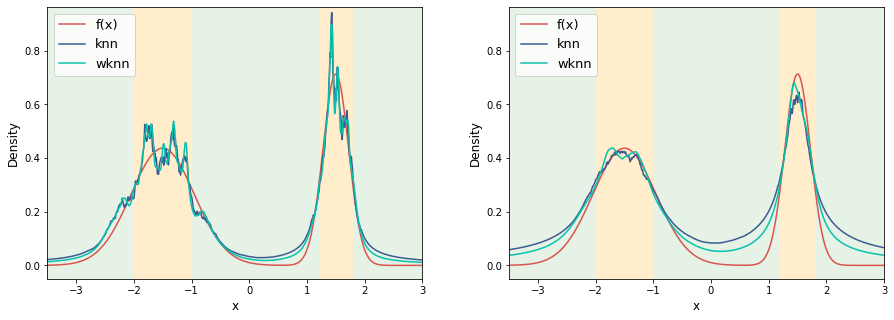

In [11]:

df1 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])
df2 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])




# setting s
dim=1
n_train=1000
n_test=1000
distribution=2
np.random.seed(3)


# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)




## first k
# fit model 
k1=50
modelKNN=KNN(k=k1)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k1)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df1["x"]=X_test.ravel()
df1["f(x)"]=pdf_X_test
df1["knn"]=pdf_KNN
df1["wknn"]=pdf_WKNN
df1["k"]=k1

## second k
# fit model 
k2=200
modelKNN=KNN(k=k2)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k2)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df2["x"]=X_test.ravel()
df2["f(x)"]=pdf_X_test
df2["knn"]=pdf_KNN
df2["wknn"]=pdf_WKNN
df2["k"]=k2

# generate screen
fig = plt.figure(figsize=(15,5))
ax=[]
ax.append(plt.subplot2grid((1,15), (0, 0), colspan=7))
ax.append(plt.subplot2grid((1,15), (0, 8), colspan=7))
plt.subplots_adjust(wspace=1,hspace=0.5)


# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax[0].add_patch(rectangle)

#ax[0].axhline(0.3,lw=1,color="black",linestyle='--')

rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax[1].add_patch(rectangle)

#ax[1].axhline(0.3,lw=1,color="black",linestyle='--')


# plot lines
line1, = ax[0].plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[0].plot(df1["x"], df1['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'knn')
line3, = ax[0].plot(df1["x"], df1['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'wknn')
line4, = ax[1].plot(df1["x"], df2['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line5, = ax[1].plot(df1["x"], df2['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'knn')
line6, = ax[1].plot(df1["x"], df2['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'wknn')
# set axis x
_=ax[0].set_xlim([range_l,range_u])
_=ax[1].set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax[0].set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))

_=ax[1].set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))

# set text
_=ax[1].set_xlabel("x",fontsize = 12)
_=ax[0].set_xlabel("x",fontsize = 12)
_=ax[0].set_ylabel("Density",fontsize = 12)
_=ax[1].set_ylabel("Density",fontsize = 12)



_=ax[1].legend(handles = [line1,line2,line3],loc="upper left",fontsize=13)
_=ax[0].legend(handles = [line1,line2,line3],loc="upper left",fontsize=13)


plt.savefig("./plot_result/illustration.pdf",bbox_inches="tight")




### Two plot

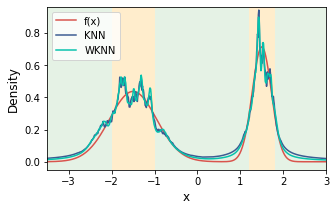

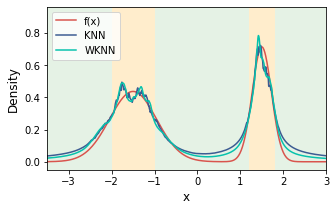

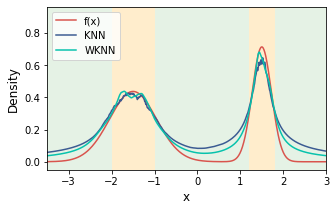

In [2]:

df1 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])
df2 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])
df3 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])




# setting s
dim=1
n_train=1000
n_test=1000
distribution=2
np.random.seed(3)


# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

## the parameters
k1=50
k2=100
k3=200


## first k
# fit model 

modelKNN=KNN(k=k1)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k1)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df1["x"]=X_test.ravel()
df1["f(x)"]=pdf_X_test
df1["KNN"]=pdf_KNN
df1["WKNN"]=pdf_WKNN
df1["k"]=k1

## second k
# fit model 

modelKNN=KNN(k=k2)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k2)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df2["x"]=X_test.ravel()
df2["f(x)"]=pdf_X_test
df2["KNN"]=pdf_KNN
df2["WKNN"]=pdf_WKNN
df2["k"]=k2

## third k
# fit model 

modelKNN=KNN(k=k3)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k3)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df3["x"]=X_test.ravel()
df3["f(x)"]=pdf_X_test
df3["KNN"]=pdf_KNN
df3["WKNN"]=pdf_WKNN
df3["k"]=k3

# generate screen
fig, ax = plt.subplots(figsize=(5,3))

# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

#ax[0].axhline(0.3,lw=1,color="black",linestyle='--')




# plot lines
line1, = ax.plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax.plot(df1["x"], df1['KNN'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line3, = ax.plot(df1["x"], df1['WKNN'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')

# set axis x
_=ax.set_xlim([range_l,range_u])


# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))


# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)



_=ax.legend(handles = [line1,line2,line3],loc="upper left")


plt.savefig("./plot_result/illustration_0.pdf",bbox_inches="tight")


# generate screen
fig, ax = plt.subplots(figsize=(5,3))

# set background
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

#ax[1].axhline(0.3,lw=1,color="black",linestyle='--')

# plot lines 
line4, = ax.plot(df1["x"], df2['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line5, = ax.plot(df1["x"], df2['KNN'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line6, = ax.plot(df1["x"], df2['WKNN'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')


# set axis x
_=ax.set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))


# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)

# legend
_=ax.legend(handles = [line1,line2,line3],loc="upper left")

plt.savefig("./plot_result/illustration_1.pdf",bbox_inches="tight")



# generate screen
fig, ax = plt.subplots(figsize=(5, 3))

# set background
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

#ax[1].axhline(0.3,lw=1,color="black",linestyle='--')

# plot lines 
line7, = ax.plot(df1["x"], df3['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line8, = ax.plot(df1["x"], df3['KNN'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line9, = ax.plot(df1["x"], df3['WKNN'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')


# set axis x
_=ax.set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))


# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)

# legend
_=ax.legend(handles = [line1,line2,line3],loc="upper left")

plt.savefig("./plot_result/illustration_2.pdf",bbox_inches="tight")

## High Dimensional Illustration

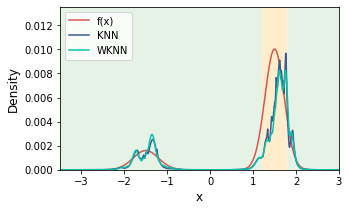

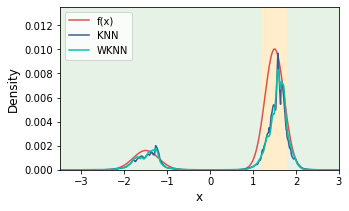

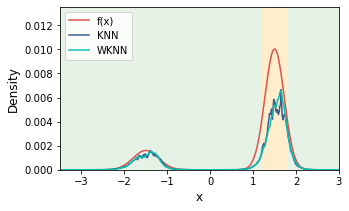

In [3]:

df1 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])
df2 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])
df3 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])




# setting s
dim=8
n_train=5000
n_test=1000
distribution=17
np.random.seed(319)
# 319

# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
X_test=np.hstack([X_test for _ in range(dim)])
pdf_X_test=density.density(X_test)

# the parameters
k1=3
k2=6
k3=10

## first k
# fit model 
modelKNN=KNN(k=k1)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k1)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df1["x"]=X_test[:,0].ravel()
df1["f(x)"]=pdf_X_test
df1["knn"]=pdf_KNN
df1["wknn"]=pdf_WKNN
df1["k"]=k1

## second k
# fit model 
modelKNN=KNN(k=k2)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k2)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df2["x"]=X_test[:,0].ravel()
df2["f(x)"]=pdf_X_test
df2["knn"]=pdf_KNN
df2["wknn"]=pdf_WKNN
df2["k"]=k2

## third k
# fit model 
modelKNN=KNN(k=k3)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k3)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df3["x"]=X_test[:,0].ravel()
df3["f(x)"]=pdf_X_test
df3["knn"]=pdf_KNN
df3["wknn"]=pdf_WKNN
df3["k"]=k3

# generate screen
fig, ax = plt.subplots(figsize=(5,3))

# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

#ax[0].axhline(0.3,lw=1,color="black",linestyle='--')




# plot lines
line1, = ax.plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax.plot(df1["x"], df1['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line3, = ax.plot(df1["x"], df1['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')

# set axis x
_=ax.set_xlim([range_l,range_u])


# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l,interval_u+0.35*(interval_u-interval_l))


# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)



_=ax.legend(handles = [line1,line2,line3],loc="upper left")


plt.savefig("./plot_result/illustration_highdim_0.pdf",bbox_inches="tight")


# generate screen
fig, ax = plt.subplots(figsize=(5,3))

# set background
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

#ax[1].axhline(0.3,lw=1,color="black",linestyle='--')

# plot lines 
line4, = ax.plot(df1["x"], df2['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line5, = ax.plot(df1["x"], df2['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line6, = ax.plot(df1["x"], df2['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')


# set axis x
_=ax.set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l,interval_u+0.35*(interval_u-interval_l))


# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)

# legend
_=ax.legend(handles = [line1,line2,line3],loc="upper left")

plt.savefig("./plot_result/illustration_highdim_1.pdf",bbox_inches="tight")


# generate screen
fig, ax = plt.subplots(figsize=(5,3))

# set background
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

#ax[1].axhline(0.3,lw=1,color="black",linestyle='--')

# plot lines 
line7, = ax.plot(df1["x"], df3['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line8, = ax.plot(df1["x"], df3['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line9, = ax.plot(df1["x"], df3['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')


# set axis x
_=ax.set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l,interval_u+0.35*(interval_u-interval_l))


# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)

# legend
_=ax.legend(handles = [line1,line2,line3],loc="upper left")

plt.savefig("./plot_result/illustration_highdim_2.pdf",bbox_inches="tight")


## Illustration of Adaptivity of Optimization Problem

In [5]:
dim=1
n_train=1000
n_test=1000
distribution=2
np.random.seed(3)
C=1

# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.array([[-1.5],[0.5],[1.5]])
pdf_X_test=density.density(X_test)

tree = KDTree(X_train)
distance_matrix,_=tree.query(X_test,n_train)
weight_matrix=[weight_selection(C*distance_matrix[i],1)[0] for i in range(3)]

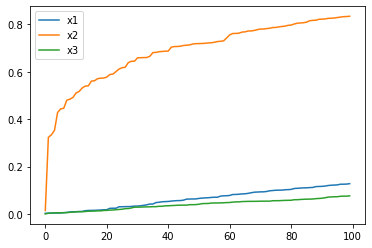

In [6]:

_=plt.plot(distance_matrix[0][:100],label="x1")
_=plt.plot(distance_matrix[1][:100],label="x2")
_=plt.plot(distance_matrix[2][:100],label="x3")

_=plt.legend()

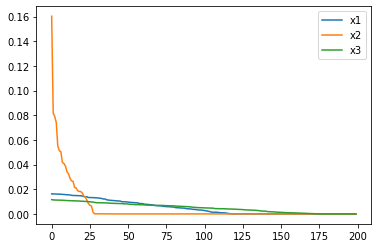

In [7]:
_=plt.plot(weight_matrix[0][:200],label="x1")
_=plt.plot(weight_matrix[1][:200],label="x2")
_=plt.plot(weight_matrix[2][:200],label="x3")

_=plt.legend()

## Parameter Analysis

In [8]:
# initialize data frame
df = pd.DataFrame(columns=["C","L2","mae","mse","d"])

# setting and sampling
dim=2
n_train=1000
n_test=2000
distribution=4
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()

X_train, pdf_X_train = density.generate(n_train)
X_test, pdf_X_test = density.generate(n_test)


# metric function 
def mae(x,y):
    return np.abs(x-y).mean()
def mse(x,y):
    return ((x-y)**2).mean()




# range for parameter 
range_l,range_u=0.001,1.5

for C in np.arange(range_l,range_u,0.1):
    # training and estimate integral
    modelAWNN=AWNN(C=C).fit(X_train)
    L2_statistic=-modelAWNN.score(X_test)
    estDensity=np.exp(modelAWNN.log_density)
    df=df.append({"C":C,"L2":L2_statistic,
                                  "mse":mse(estDensity,pdf_X_test),
                                 "mae":mae(estDensity,pdf_X_test),"d":dim},ignore_index=True)
    
   



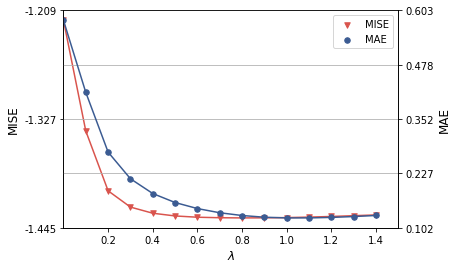

In [9]:
# first line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'MISE')
p1 = ax1.scatter(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = 'MISE')
# second line
ax2 = ax1.twinx()
line2, = ax2.plot(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'MAE')
p2 = ax2.scatter(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = 'MAE')

# axis setting
_=ax1.set_xlim([range_l,range_u])
interval_l,interval_u=df["L2"].to_numpy().min(),df["L2"].to_numpy().max()
_=ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=df["mae"].to_numpy().min(),df["mae"].to_numpy().max()
_=ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

_=ax1.set_xlabel(r'$\lambda$',fontsize = 12)
_=ax1.set_ylabel("MISE",fontsize = 12)
_=ax2.set_ylabel("MAE",fontsize = 12)

ax1.yaxis.set_major_locator(LinearLocator(3)) 
ax2.yaxis.set_major_locator(LinearLocator(5)) 
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
# set legend and grid
_=plt.legend(handles = [p1,p2])
plt.grid(axis='y')
plt.savefig("./plot_result/parameter_analysis_dimension_{}.pdf".format(dim),bbox_inches="tight")



In [52]:
# initialize data frame
df = pd.DataFrame(columns=["C","L2","mae","mse","d"])

# setting and sampling
dim=5
n_train=1000
n_test=2000
distribution=4
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()

X_train, pdf_X_train = density.generate(n_train)
X_test, pdf_X_test = density.generate(n_test)


# metric function 
def mae(x,y):
    return np.abs(x-y).mean()
def mse(x,y):
    return ((x-y)**2).mean()




# range for parameter 
range_l,range_u=0.5,2.5

for C in np.arange(range_l,range_u,0.1):
    # training and estimate integral
    modelAWNN=AWNN(C=C).fit(X_train)
    L2_statistic=-modelAWNN.score(X_test)
    estDensity=np.exp(modelAWNN.log_density)
    df=df.append({"C":C,"L2":L2_statistic,
                                  "mse":mse(estDensity,pdf_X_test),
                                 "mae":mae(estDensity,pdf_X_test),"d":dim},ignore_index=True)
    
  


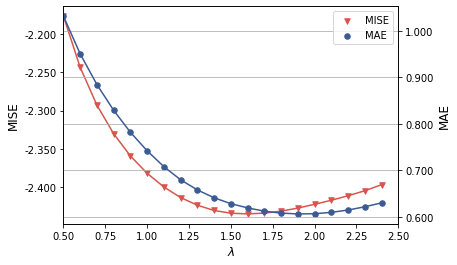

In [53]:
 
# first line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'MISE')
p1 = ax1.scatter(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = 'MISE')
# second line
ax2 = ax1.twinx()
line2, = ax2.plot(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'MAE')
p2 = ax2.scatter(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = 'MAE')

# axis setting
_=ax1.set_xlim([range_l,range_u])
interval_l,interval_u=df["L2"].to_numpy().min(),df["L2"].to_numpy().max()
_=ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=df["mae"].to_numpy().min(),df["mae"].to_numpy().max()
_=ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

_=ax1.set_xlabel(r'$\lambda$',fontsize = 12)
_=ax1.set_ylabel("MISE",fontsize = 12)
_=ax2.set_ylabel("MAE",fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))

# set legend and grid
_=plt.legend(handles = [p1,p2])
plt.grid(axis='y')
plt.savefig("./plot_result/parameter_analysis_dimension_{}.pdf".format(dim),bbox_inches="tight")



In [54]:
# initialize data frame
df = pd.DataFrame(columns=["C","L2","mae","mse","d"])

# setting and sampling
dim=8
n_train=1000
n_test=2000
distribution=4
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()

X_train, pdf_X_train = density.generate(n_train)
X_test, pdf_X_test = density.generate(n_test)


# metric function 
def mae(x,y):
    return np.abs(x-y).mean()
def mse(x,y):
    return ((x-y)**2).mean()

# sampling for integration estimation
def grid_training(X,nsample=0):
    dim=X.shape[1]
    potentialNeighbors=X.shape[0]
    if nsample==0:
        nsample=potentialNeighbors*dim**2
    lower=np.array([np.quantile(X[:,i],0.01) for i in range(dim)])
    upper=np.array([np.quantile(X[:,i],1-0.01) for i in range(dim)])
        

    return np.random.rand(int(nsample),dim)*(upper-lower)+lower,np.prod(upper-lower)



X_validate,mass=grid_training(X_train,n_train*dim**2)



# range for parameter 
range_l,range_u=1.5,3.5

for C in np.arange(range_l,range_u,0.1):
    # training and estimate integral
    modelAWNN=AWNN(C=C).fit(X_train)
    L2_statistic=-modelAWNN.score(X_test)
    estDensity=np.exp(modelAWNN.log_density)
    df=df.append({"C":C,"L2":L2_statistic,
                                  "mse":mse(estDensity,pdf_X_test),
                                 "mae":mae(estDensity,pdf_X_test),"d":dim},ignore_index=True)
    
 


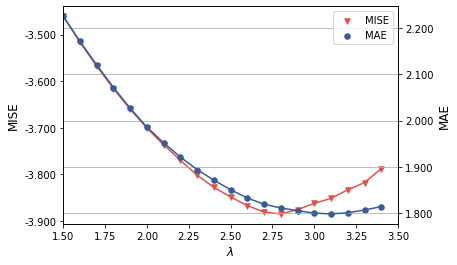

In [55]:
  
# first line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'MISE')
p1 = ax1.scatter(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = 'MISE')
# second line
ax2 = ax1.twinx()
line2, = ax2.plot(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'MAE')
p2 = ax2.scatter(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = 'MAE')

# axis setting
_=ax1.set_xlim([range_l,range_u])
interval_l,interval_u=df["L2"].to_numpy().min(),df["L2"].to_numpy().max()
_=ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=df["mae"].to_numpy().min(),df["mae"].to_numpy().max()
_=ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

_=ax1.set_xlabel(r'$\lambda$',fontsize = 12)
_=ax1.set_ylabel("MISE",fontsize = 12)
_=ax2.set_ylabel("MAE",fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))

# set legend and grid
_=plt.legend(handles = [p1,p2])
plt.grid(axis='y')
plt.savefig("./plot_result/parameter_analysis_dimension_{}.pdf".format(dim),bbox_inches="tight")



## Adaptivity Analysis

### One plot

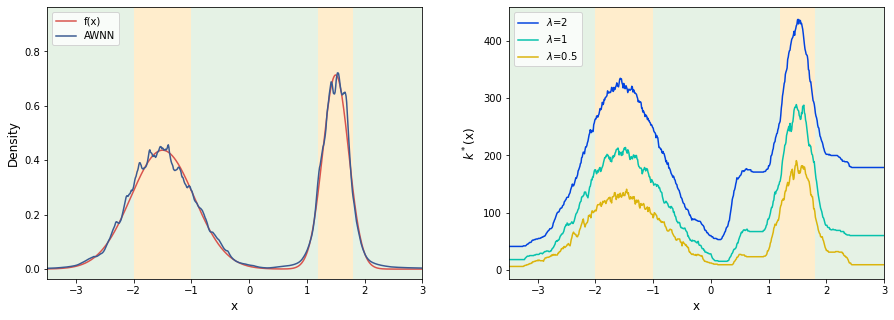

In [48]:
# produce the data frames for different C
df1 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])
df2 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])
df3 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])



# setting s
dim=1
n_train=2000
n_test=1000
distribution=2
np.random.seed(4)


# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

# train with different C
C=(2,1,0.5)


## first C 
# fit model 
modelAWNN=AWNN(C=1/C[0],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df1["x"]=X_test.ravel()
df1["f(x)"]=pdf_X_test
df1["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df1["distribution"]=distribution
df1["C"]=C[0]
df1["estimation"]=np.exp(estimation)

## second C 
# fit model 
modelAWNN=AWNN(C=1/C[1],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df2["x"]=X_test.ravel()
df2["f(x)"]=pdf_X_test
df2["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df2["distribution"]=distribution
df2["C"]=C[1]
df2["estimation"]=np.exp(estimation)

## third C 
# fit model 
modelAWNN=AWNN(C=1/C[2],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df3["x"]=X_test.ravel()
df3["f(x)"]=pdf_X_test
df3["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df3["distribution"]=distribution
df3["C"]=C[2]
df3["estimation"]=np.exp(estimation)

# generate screen
fig = plt.figure(figsize=(15,5))
ax=[]
ax.append(plt.subplot2grid((1,15), (0, 0), colspan=7))
ax.append(plt.subplot2grid((1,15), (0, 8), colspan=7))
plt.subplots_adjust(wspace=1,hspace=0.5)


# plot lines
line0, = ax[0].plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line1, = ax[0].plot(df2["x"], df2['estimation'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'AWNN')
line2, = ax[1].plot(df1["x"], df1['k(x)'],color = sns.xkcd_rgb["blue"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[0]))
line3, = ax[1].plot(df2["x"], df2['k(x)'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[1]))
line4, = ax[1].plot(df3["x"], df3['k(x)'],color = sns.xkcd_rgb["gold"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[2]))

# set axis x
_=ax[0].set_xlim([range_l,range_u])
_=ax[1].set_xlim([range_l,range_u])

# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax[0].add_patch(rectangle)

rectangle=patches.Rectangle((1.2, -100), 0.6, 1000,facecolor="orange",alpha=0.2)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -100), 1, 1000,facecolor="orange",alpha=0.2)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -100), 1.5, 1000,facecolor="green",alpha=0.1)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -100), 2.2, 1000,facecolor="green",alpha=0.1)
_=ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -100), 1.2, 1000,facecolor="green",alpha=0.1)
_=ax[1].add_patch(rectangle)

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax[0].set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.35*(interval_u-interval_l))
interval_l,interval_u=df3["k(x)"].to_numpy().min(),df1["k(x)"].to_numpy().max()
_=ax[1].set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

# set text
_=ax[1].set_xlabel("x",fontsize = 12)
_=ax[0].set_xlabel("x",fontsize = 12)
_=ax[0].set_ylabel("Density",fontsize = 12)
_=ax[1].set_ylabel(r"$k^*$(x)",fontsize = 12)



_=ax[1].legend(handles = [line2,line3,line4],loc="upper left")
_=ax[0].legend(handles = [line0,line1],loc="upper left")


plt.savefig("./plot_result/adaptivity_analysis.pdf".format(distribution),bbox_inches="tight")




### Two plot

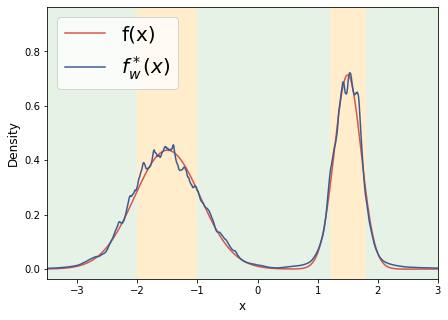

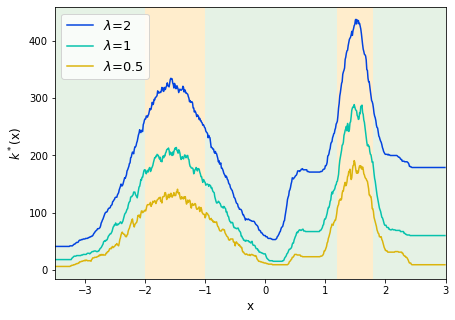

In [16]:
# produce the data frames for different C
df1 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])
df2 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])
df3 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])



# setting s
dim=1
n_train=2000
n_test=1000
distribution=2
np.random.seed(4)


# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

# train with different C
C=(2,1,0.5)


## first C 
# fit model 
modelAWNN=AWNN(C=1/C[0],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df1["x"]=X_test.ravel()
df1["f(x)"]=pdf_X_test
df1["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df1["distribution"]=distribution
df1["C"]=C[0]
df1["estimation"]=np.exp(estimation)

## second C 
# fit model 
modelAWNN=AWNN(C=1/C[1],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df2["x"]=X_test.ravel()
df2["f(x)"]=pdf_X_test
df2["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df2["distribution"]=distribution
df2["C"]=C[1]
df2["estimation"]=np.exp(estimation)

## third C 
# fit model 
modelAWNN=AWNN(C=1/C[2],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df3["x"]=X_test.ravel()
df3["f(x)"]=pdf_X_test
df3["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df3["distribution"]=distribution
df3["C"]=C[2]
df3["estimation"]=np.exp(estimation)

# generate screen
fig, ax = plt.subplots(figsize=(7,5))

# plot lines
line0, = ax.plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line1, = ax.plot(df2["x"], df2['estimation'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = r'$f_w^*(x)$')

# set axis x
_=ax.set_xlim([range_l,range_u])


# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)


# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.35*(interval_u-interval_l))

# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)



# legend
_=ax.legend(handles = [line0,line1],loc="upper left",fontsize=20)


plt.savefig("./plot_result/adaptivity_analysis_0.pdf".format(distribution),bbox_inches="tight")

# generate screen
fig, ax = plt.subplots(figsize=(7,5))


# plot lines
line2, = ax.plot(df1["x"], df1['k(x)'],color = sns.xkcd_rgb["blue"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[0]))
line3, = ax.plot(df2["x"], df2['k(x)'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[1]))
line4, = ax.plot(df3["x"], df3['k(x)'],color = sns.xkcd_rgb["gold"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[2]))

# axis and margin
interval_l,interval_u=df3["k(x)"].to_numpy().min(),df1["k(x)"].to_numpy().max()
_=ax.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

# set axis x
_=ax.set_xlim([range_l,range_u])

# background
rectangle=patches.Rectangle((1.2, -100), 0.6, 1000,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -100), 1, 1000,facecolor="orange",alpha=0.2)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -100), 1.5, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -100), 2.2, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -100), 1.2, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel(r"$k^*$(x)",fontsize = 12)

# legend
_=ax.legend(handles = [line2,line3,line4],loc="upper left",fontsize=13)

plt.savefig("./plot_result/adaptivity_analysis_1.pdf".format(distribution),bbox_inches="tight")


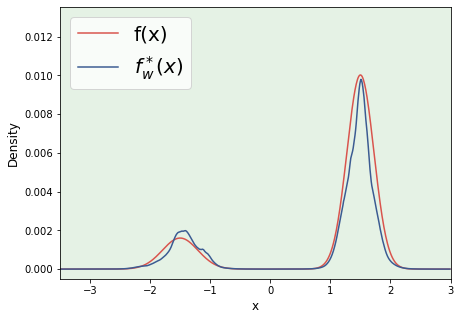

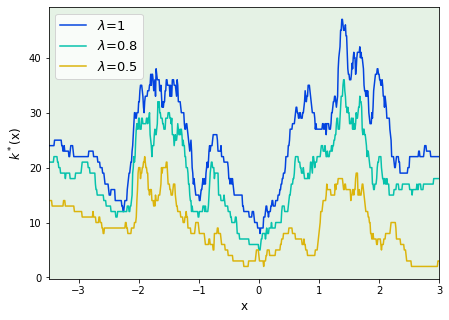

In [19]:
# produce the data frames for different C
df1 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])
df2 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])
df3 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C","estimation"])



# setting s
dim=8
n_train=5000
n_test=1000
distribution=17
np.random.seed(1099)
# 51 1099

# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
X_test=np.hstack([X_test for _ in range(dim)])
pdf_X_test=density.density(X_test)

# train with different C
C=(1,0.8,0.5)


## first C 
# fit model 
modelAWNN=AWNN(C=1/C[0],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df1["x"]=X_test[:,0].ravel()
df1["f(x)"]=pdf_X_test
df1["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df1["distribution"]=distribution
df1["C"]=C[0]
df1["estimation"]=np.exp(estimation)

## second C 
# fit model 
modelAWNN=AWNN(C=1/C[1],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df2["x"]=X_test[:,0].ravel()
df2["f(x)"]=pdf_X_test
df2["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df2["distribution"]=distribution
df2["C"]=C[1]
df2["estimation"]=np.exp(estimation)

## third C 
# fit model 
modelAWNN=AWNN(C=1/C[2],save_weights=True,cut_off=1)
_=modelAWNN.fit(X_train)
estimation=modelAWNN.predict(X_test)
# change frame
df3["x"]=X_test[:,0].ravel()
df3["f(x)"]=pdf_X_test
df3["k(x)"]=(modelAWNN.alpha>0).sum(axis=1)
df3["distribution"]=distribution
df3["C"]=C[2]
df3["estimation"]=np.exp(estimation)

# generate screen
fig, ax = plt.subplots(figsize=(7,5))

# plot lines
line0, = ax.plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line1, = ax.plot(df2["x"], df2['estimation'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = r'$f_w^*(x)$')
#line2, = ax.plot(df2["x"], df1['estimation'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'AWNN')
#line3, = ax.plot(df2["x"], df3['estimation'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'AWNN')

# set axis x
_=ax.set_xlim([range_l,range_u])


# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)


# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
_=ax.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.35*(interval_u-interval_l))

# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel("Density",fontsize = 12)



# legend
_=ax.legend(handles = [line0,line1],loc="upper left",fontsize=20)


plt.savefig("./plot_result/adaptivity_analysis_highdim_0.pdf".format(distribution),bbox_inches="tight")

# generate screen
fig, ax = plt.subplots(figsize=(7,5))


# plot lines
line2, = ax.plot(df1["x"], df1['k(x)'],color = sns.xkcd_rgb["blue"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[0]))
line3, = ax.plot(df2["x"], df2['k(x)'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[1]))
line4, = ax.plot(df3["x"], df3['k(x)'],color = sns.xkcd_rgb["gold"],linestyle = '-',linewidth=1.5,label = r'$\lambda$={}'.format(C[2]))

# axis and margin
interval_l,interval_u=df3["k(x)"].to_numpy().min(),df1["k(x)"].to_numpy().max()
_=ax.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

# set axis x
_=ax.set_xlim([range_l,range_u])

# background
rectangle=patches.Rectangle((1.2, -100), 0.6, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-2, -100), 1, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -100), 1.5, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((-1, -100), 2.2, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -100), 1.2, 1000,facecolor="green",alpha=0.1)
_=ax.add_patch(rectangle)

# set text
_=ax.set_xlabel("x",fontsize = 12)
_=ax.set_ylabel(r"$k^*$(x)",fontsize = 12)

# legend
_=ax.legend(handles = [line2,line3,line4],loc="upper left",fontsize=13)

plt.savefig("./plot_result/adaptivity_analysis_highdim_1.pdf".format(distribution),bbox_inches="tight")


## Smoothness Analysis 

In [17]:
# setting and sampling
dim=2
n_train=1000
n_test=100 # 100*100
distribution=17
np.random.seed(2)
interval_l,interval_u=-3.5,3.5

density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test_1=np.linspace(interval_l,interval_u,n_test)
X_test_2=np.linspace(interval_l,interval_u,n_test)
axis1,axis2=np.meshgrid(X_test_1,X_test_2)
X_test=np.array([axis1.ravel(),axis2.ravel()]).T
pdf_X_test=density.density(X_test).reshape(-1,n_test)

## produce estimation
# AWNN
model_AWNN=AWNN(C=.1).fit(X_train)
est_AWNN=np.exp(model_AWNN.predict(X_test).reshape(-1,n_test))
# KNN
model_KNN=KNN(k=40).fit(X_train,method="KNN")
est_KNN=np.exp(model_KNN.predict(X_test).reshape(-1,n_test))
# WKNN
model_WKNN=KNN(k=40).fit(X_train,method="WKNN")
est_WKNN=np.exp(model_WKNN.predict(X_test).reshape(-1,n_test))







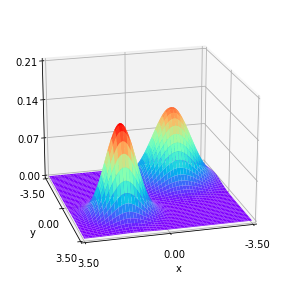

In [18]:

## poplation 
# creat surface


fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')


surf=ax.plot_surface(axis1, axis2, pdf_X_test, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")


# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_population.pdf",bbox_inches="tight")
plt.show()

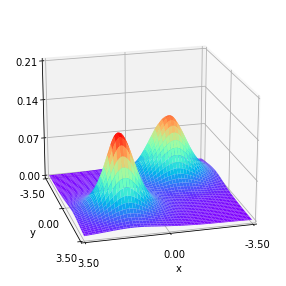

In [19]:
## AWNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_AWNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")

# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_AWNN.pdf",bbox_inches="tight")


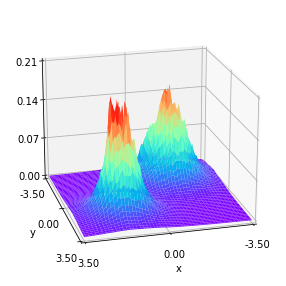

In [20]:
## KNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_KNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")


# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_KNN.pdf",bbox_inches="tight")
plt.show()

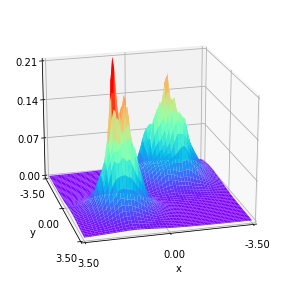

In [21]:
## WKNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_WKNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
_=ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
_=plt.xlabel("x")
_=plt.ylabel("y")

# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_WKNN.pdf",bbox_inches="tight")
plt.show()

## Impact of C on Smoothness

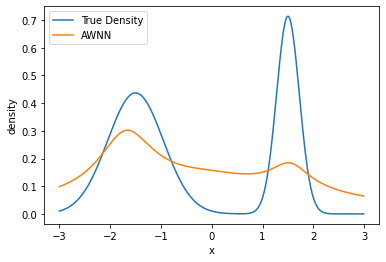

In [22]:
# settings and sampling
dim=1
n_train=2000
distribution=2
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=0.01
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
_=plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
_=plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
_=plt.legend()
_=plt.xlabel("x")
_=plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_1.pdf".format(distribution,C),bbox_inches="tight")



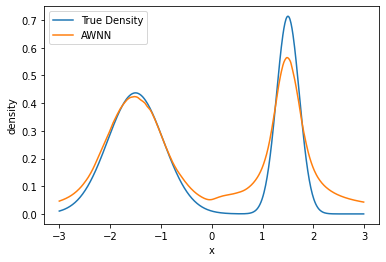

In [23]:
# settings and sampling
dim=1
n_train=2000
distribution=2
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=0.1
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
_=plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
_=plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
_=plt.legend()
_=plt.xlabel("x")
_=plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_2.pdf".format(distribution,C),bbox_inches="tight")



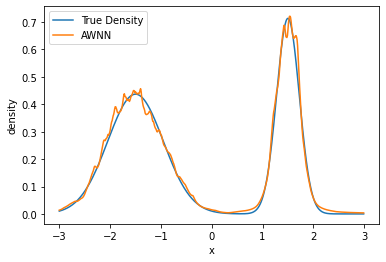

In [24]:
# settings and sampling
dim=1
n_train=2000
distribution=2
np.random.seed(4)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=1
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
_=plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
_=plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
_=plt.legend()
_=plt.xlabel("x")
_=plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_3.pdf".format(distribution,C),bbox_inches="tight")



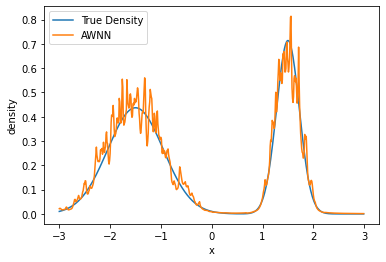

In [25]:
# settings and sampling
dim=1
n_train=2000
distribution=2
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=5
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
_=plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
_=plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
_=plt.legend()
_=plt.xlabel("x")
_=plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_4.pdf".format(distribution,C),bbox_inches="tight")



## Illustrative Weights

In [26]:
def weight_selection(beta,cut_off=1):
    potentialNeighbors=len(beta)
    alphaIndexMax=0
    lamda = beta[0]+1 
    Sum_beta = 0
    Sum_beta_square = 0

    # iterates for k
    
    while ( lamda>beta[alphaIndexMax] ) and (alphaIndexMax<potentialNeighbors):
        # update max index
        alphaIndexMax +=1
        # updata sum beta and sum beta square
        Sum_beta += beta[alphaIndexMax-1]
        Sum_beta_square += (beta[alphaIndexMax-1])**2
        
        # calculate lambda
        
        if  alphaIndexMax  + (Sum_beta**2 - alphaIndexMax * Sum_beta_square)>=0:
                
            
            lamda = (1/alphaIndexMax) * ( Sum_beta + math.sqrt( alphaIndexMax  + (Sum_beta**2 - alphaIndexMax * Sum_beta_square) ) )
            
        else:
            alphaIndexMax-=1
            break
    
    # estimation
    estAlpha=np.zeros(potentialNeighbors)

    
    if alphaIndexMax<cut_off:
        estAlpha[cut_off-1]=1
        return estAlpha,cut_off
    
    
    for j in range(alphaIndexMax):
        estAlpha[j]=lamda-beta[j]
    
    
    estAlpha=estAlpha/np.linalg.norm(estAlpha,ord=1)
    
    return estAlpha,alphaIndexMax



def get_weights(X_train,X_test,C):
    tree = KDTree(X_train)

    distance_vec,_=tree.query(X_test.reshape(1,-1),X_train.shape[0])
    distance_vec=distance_vec[0]
    
    beta=C*distance_vec
    return weight_selection(beta)

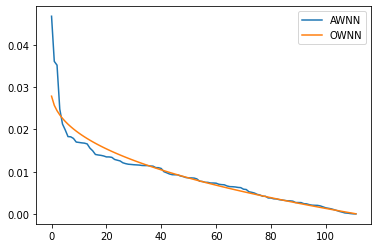

In [27]:
dim=5
distribution_index=2
density=TestDistribution(distribution_index,dim).returnDistribution()
np.random.seed(1)
n_train = 2000
C={"2":0.1,"5":0.3,"8":1.5}
X_train, pdf_X_train = density.generate(n_train)

X_test=np.zeros(dim).reshape(1,-1)

AWNN_weights, idx_max=get_weights(X_train,X_test,C["{}".format(dim)])


k=idx_max

OWNN_weights=np.array([1/k*(1+dim/2-dim/2/k**(2/dim)*(i**(1+2/dim)-(i-1)**(1+2/dim))) for i in range(1,k+1)])

_=plt.plot(AWNN_weights[:idx_max],label="AWNN")
_=plt.plot(OWNN_weights[:idx_max],label="OWNN")
_=plt.legend()

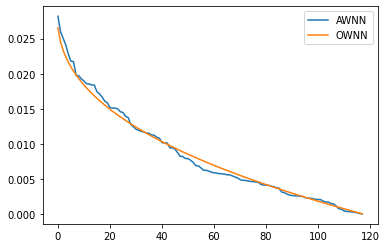

In [28]:
dim=5
distribution_index=2
density=TestDistribution(distribution_index,dim).returnDistribution()
np.random.seed(1)
n_train = 2000
C={"2":0.3,"5":0.6,"8":1.5}
X_train, pdf_X_train = density.generate(n_train)

X_test=np.ones(dim).reshape(1,-1)

AWNN_weights, idx_max=get_weights(X_train,X_test,C["{}".format(dim)])


k=idx_max

OWNN_weights=np.array([1/k*(1+dim/2-dim/2/k**(2/dim)*(i**(1+2/dim)-(i-1)**(1+2/dim))) for i in range(1,k+1)])

_=plt.plot(AWNN_weights[:idx_max],label="AWNN")
_=plt.plot(OWNN_weights[:idx_max],label="OWNN")
_=plt.legend()

## Bias Analysis

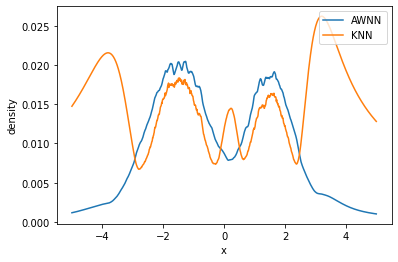

In [29]:
# settings and sampling
dim=1
n_train=2000
distribution=17

range_l,range_u=-5,5

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=1000
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    

    model_AWNN=AWNN(C=0.6).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=150).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    


# AWNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
_=plt.xlabel("x")
# KNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
_=plt.legend(loc=1)
_=plt.ylabel("density")

plt.savefig("./plot_result/analysis_bias.pdf".format(distribution,C),bbox_inches="tight")



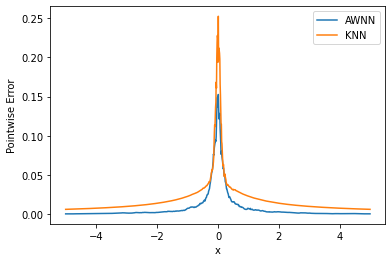

In [30]:
# settings and sampling
dim=1
n_train=2000
distribution=12

range_l,range_u=-5,5

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=100
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    
    parameters={"C":[i for i in np.logspace(-2,5,15)]}
    cv_model_AWNN=GridSearchCV(estimator=AWNN(),param_grid=parameters,n_jobs=10,cv=10)
    _=cv_model_AWNN.fit(X_train)
    model_AWNN=cv_model_AWNN.best_estimator_
    #model_AWNN.C
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    parameters={"k":[int(i*n_train) for i in np.logspace(-2.5,np.log(2/3)/np.log(10),15)]}
    cv_model_KNN=GridSearchCV(estimator=KNN(),param_grid=parameters,n_jobs=-1,cv=10)
    _=cv_model_KNN.fit(X_train,method="KNN")
    model_KNN=cv_model_KNN.best_estimator_
    #model_KNN.k
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    



# AWNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
_=plt.xlabel("x")
# KNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
_=plt.legend(loc=0)
_=plt.ylabel("Pointwise Error")



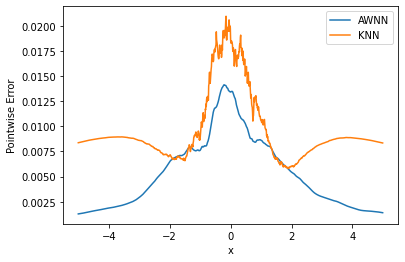

In [31]:
from distributions import TDistribution

# settings and sampling
dim=1
n_train=2000


range_l,range_u=-5,5

density=TDistribution(loc=np.zeros(dim),scale=np.ones(dim),df=2)

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=100
for s in range(m):
    
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    
    model_AWNN=AWNN(C=0.1).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=197).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)


# AWNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
_=plt.xlabel("x")
# KNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
_=plt.legend(loc=0)
_=plt.ylabel("Pointwise Error")



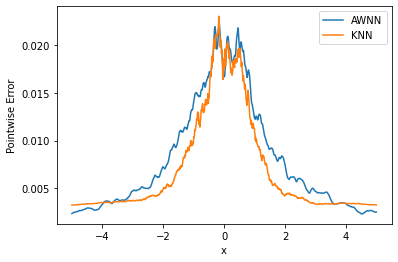

In [32]:
from distributions import CauchyDistribution

# settings and sampling
dim=1
n_train=2000
distribution=12

range_l,range_u=-5,5

density=CauchyDistribution(loc=np.zeros(dim),scale=np.ones(dim))

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=100
for s in range(m):
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)

    model_AWNN=AWNN(C=0.5).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=150).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)


# AWNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
_=plt.xlabel("x")
# KNN
_=plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
_=plt.legend(loc=0)
_=plt.ylabel("Pointwise Error")



### New plot method

In [33]:
# settings and sampling
dim=1
n_train=2000
distribution=2

range_l,range_u=-6,6

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
estDensity_WKNN=np.zeros(pdf_X_test.shape)
m=1000
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    

    model_AWNN=AWNN(C=0.6).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=150).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    
    model_WKNN=KNN(k=150).fit(X_train,method="WKNN")
    estDensity_WKNN+=np.abs(np.exp(model_WKNN.predict(X_test))-pdf_X_test)
    
pointwise_KNN=estDensity_KNN/m
pointwise_WKNN=estDensity_WKNN/m
pointwise_AWNN=estDensity_AWNN/m

'\n# pointwise error line    \nfig, ax1 = plt.subplots()\nline1, = ax1.plot(X_test, pdf_X_test,color = sns.xkcd_rgb["medium green"],linestyle = \'-\',label = \'density\')\n\n# population density \nax2 = ax1.twinx()\nline2, = ax2.plot(X_test, pointwise_KNN,color = sns.xkcd_rgb["denim blue"],linestyle = \'-\',label = \'KNN\')\nline3, = ax2.plot(X_test, pointwise_AWNN,color = sns.xkcd_rgb["pale red"],linestyle = \'-\',label = \'AWNN\')\n\n\n# axis setting\nax1.set_xlim([range_l,range_u])\ninterval_l,interval_u=pdf_X_test.min(),pdf_X_test.max()\nax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))\n\ninterval_l,interval_u=pointwise_AWNN.min(),pointwise_KNN.max()\nax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.3*(interval_u-interval_l))\n\nax1.set_xlabel("x",fontsize = 12)\nax1.set_ylabel("density",fontsize = 12)\nax2.set_ylabel("pointwise error",fontsize = 12)\nax1.yaxis.set_major_formatter(mtick.FormatStrFormatter(\'%.2f\'))\nax2

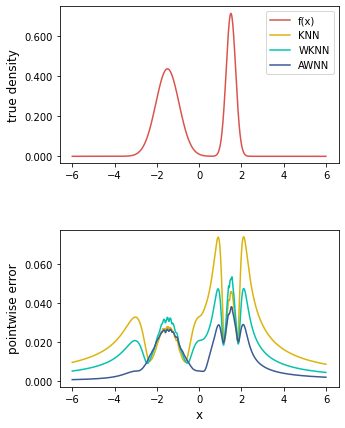

In [34]:
# generate screen
fig = plt.figure(figsize=(5,7))
ax=[]
ax.append(plt.subplot2grid((31,1), (0, 0), rowspan=13))
ax.append(plt.subplot2grid((31,1), (18, 0), rowspan=13))
plt.subplots_adjust(wspace=1,hspace=0.5)


# plot lines
line1, = ax[0].plot(X_test,pdf_X_test,color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[1].plot(X_test,pointwise_KNN,color = sns.xkcd_rgb["gold"],linestyle = '-',label = 'KNN')
line3, = ax[1].plot(X_test,pointwise_WKNN,color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')
line4, = ax[1].plot(X_test,pointwise_AWNN,color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'AWNN')

# set legend and grid
_=ax[0].legend(handles = [line1,line2,line3,line4],)


_=ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
_=ax[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
_=ax[1].set_xlabel("x",fontsize = 12)
_=ax[0].set_ylabel("true density",fontsize = 12)
_=ax[1].set_ylabel("pointwise error",fontsize = 12)
plt.savefig("./plot_result/bias_analysis_1.pdf".format(dim),bbox_inches="tight",dpi=600)



In [35]:
# settings and sampling
dim=1
n_train=2000
distribution=12

range_l,range_u=-1.,1.

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
estDensity_WKNN=np.zeros(pdf_X_test.shape)
m=1000
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    

    model_AWNN=AWNN(C=1.2).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=200).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    
    model_WKNN=KNN(k=200).fit(X_train,method="WKNN")
    estDensity_WKNN+=np.abs(np.exp(model_WKNN.predict(X_test))-pdf_X_test)
    
pointwise_KNN=estDensity_KNN/m
pointwise_WKNN=estDensity_WKNN/m
pointwise_AWNN=estDensity_AWNN/m

'\n# pointwise error line    \nfig, ax1 = plt.subplots()\nline1, = ax1.plot(X_test, pdf_X_test,color = sns.xkcd_rgb["medium green"],linestyle = \'-\',label = \'density\')\n\n# population density \nax2 = ax1.twinx()\nline2, = ax2.plot(X_test, pointwise_KNN,color = sns.xkcd_rgb["denim blue"],linestyle = \'-\',label = \'KNN\')\nline3, = ax2.plot(X_test, pointwise_AWNN,color = sns.xkcd_rgb["pale red"],linestyle = \'-\',label = \'AWNN\')\n\n\n# axis setting\nax1.set_xlim([range_l,range_u])\ninterval_l,interval_u=pdf_X_test.min(),pdf_X_test.max()\nax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))\n\ninterval_l,interval_u=pointwise_AWNN.min(),pointwise_KNN.max()\nax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.3*(interval_u-interval_l))\n\nax1.set_xlabel("x",fontsize = 12)\nax1.set_ylabel("density",fontsize = 12)\nax2.set_ylabel("pointwise error",fontsize = 12)\nax1.yaxis.set_major_formatter(mtick.FormatStrFormatter(\'%.2f\'))\nax2

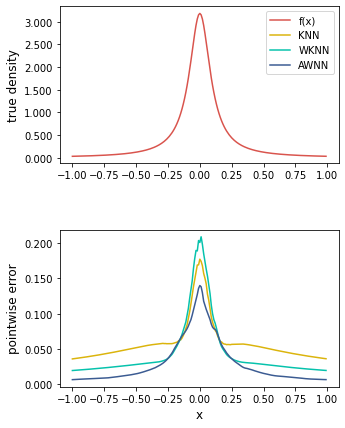

In [36]:
# generate screen
fig = plt.figure(figsize=(5,7))
ax=[]
ax.append(plt.subplot2grid((31,1), (0, 0), rowspan=13))
ax.append(plt.subplot2grid((31,1), (18, 0), rowspan=13))
plt.subplots_adjust(wspace=1,hspace=0.5)


# plot lines
line1, = ax[0].plot(X_test,pdf_X_test,color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[1].plot(X_test,pointwise_KNN,color = sns.xkcd_rgb["gold"],linestyle = '-',label = 'KNN')
line3, = ax[1].plot(X_test,pointwise_WKNN,color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')
line4, = ax[1].plot(X_test,pointwise_AWNN,color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'AWNN')

# set legend and grid
_=ax[0].legend(handles = [line1,line2,line3,line4],)


_=ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
_=ax[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
_=ax[1].set_xlabel("x",fontsize = 12)
_=ax[0].set_ylabel("true density",fontsize = 12)
_=ax[1].set_ylabel("pointwise error",fontsize = 12)
plt.savefig("./plot_result/bias_analysis_2.pdf".format(dim),bbox_inches="tight",dpi=600)



## Time Consumption

In [37]:
dim=5
n_train_vec=[ i*100000 for i in range(1,11)]
n_test=1000
distribution=2

density=TestDistribution(distribution,dim).returnDistribution()

time_matrix=[]

for seed in range(10):
    
    np.random.seed(seed)
    time_vec=[0]

    for n_train_idx,n_train in enumerate(n_train_vec):
     
        C=0.5+0.01*n_train_idx**2
        

        X_train, pdf_X_train = density.generate(n_train)
        X_test, pdf_X_test = density.generate(n_test)


        model=AWNN(C=C,cut_off=1)

        _=model.fit(X_train,max_neighbors=int(2000+1000*n_train_idx**(1/5)))
        time_start=time()
        _=model.predict(X_test)

        time_end=time()
        time_vec.append(time_end-time_start)
    time_matrix.append(time_vec)
    


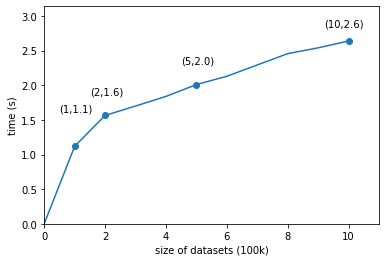

In [38]:
time_vec=np.array(time_matrix).mean(axis=0)
_=plt.plot(np.arange(len(time_vec)),time_vec)
_=plt.scatter([1,2,5,10],[time_vec[1],time_vec[2],time_vec[5],time_vec[10]])
_=plt.xlabel("size of datasets (100k)")
_=plt.ylabel("time (s)")
_=plt.xlim(0,11)
_=plt.ylim(0,max(time_vec)+0.5)
_=plt.annotate("(1,{:.1f})".format(time_vec[1]), xy = (1,time_vec[0]), xytext = (1-0.5,time_vec[1]+0.5))
_=plt.annotate("(2,{:.1f})".format(time_vec[2]), xy = (2,time_vec[1]), xytext = (2-0.5,time_vec[2]+0.3))
_=plt.annotate("(5,{:.1f})".format(time_vec[5]), xy = (5,time_vec[4]), xytext = (5-0.5,time_vec[5]+0.3))
_=plt.annotate("(10,{:.1f})".format(time_vec[10]), xy = (10,time_vec[9]), xytext = (10-0.8,time_vec[10]+0.2))
plt.savefig("./plot_result/scalability.pdf".format(dim),bbox_inches="tight")


## scalability superiority over knn

In [ ]:
dim=10
n_train_vec=[ i*100000 for i in range(1,11)]
n_test=500
distribution=17

density=TestDistribution(distribution,dim).returnDistribution()

time_matrix=[]
mae_matrix=[]
compare_time_matrix=[]
compare_mae_matrix=[]

C_vec=[0.5,0.6,0.7,0.9,1,1.2,1.4,1.6]
k_vec=[1500,2000,2500,3000,3500]
for seed in range(10):
    
    np.random.seed(seed)
    time_vec=[]
    mae_vec=[]
    compare_time_vec=[]
    compare_mae_vec=[]

    for n_train_idx,n_train in enumerate(n_train_vec):
        
        
        
        # AWNN 
        
        
        X_train, pdf_X_train = density.generate(n_train)
        X_test, pdf_X_test = density.generate(n_test)
        
        mae_save=1000
        time_save=0
        for C in C_vec:
            model=AWNN(C=C,cut_off=1)
            _=model.fit(X_train,max_neighbors=int(2000+1000*n_train_idx**(1/5)))
            time_start=time()
            log_prob=model.predict(X_test)
            time_end=time()
            
            mae_temp=np.abs(np.exp(log_prob)-pdf_X_test).mean()
            
            if mae_temp<mae_save:
                time_save=time_end-time_start
                mae_save=mae_temp
        time_vec.append(time_save)
        mae_vec.append(mae_save)
        
        # KNN 

        
        mae_save=1000
        time_save=0
        for k in k_vec:
            model=KNN(k=k)
            _=model.fit(X_train)
            time_start=time()
            log_prob=model.predict(X_test)
            time_end=time()
            
            mae_temp=np.abs(np.exp(log_prob)-pdf_X_test).mean()
            
            if mae_temp<mae_save:
                time_save=time_end-time_start
                mae_save=mae_temp
            
        compare_time_vec.append(time_save)
        compare_mae_vec.append(mae_save)
        
    time_matrix.append(time_vec)
    mae_matrix.append(mae_vec)
    compare_time_matrix.append(compare_time_vec)
    compare_mae_matrix.append(compare_mae_vec)
    
time_vec=np.array(time_matrix).mean(axis=0)
mae_vec=np.array(mae_matrix).mean(axis=0)
compare_time_vec=np.array(compare_time_matrix).mean(axis=0)
compare_mae_vec=np.array(compare_mae_matrix).mean(axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
_=ax.plot([i+1 for i in range(len(time_vec))],time_vec,label="AWNN")
_=ax.plot([i+1 for i in range(len(time_vec))],compare_time_vec,label="KNN")
_=plt.xlabel("size of datasets (100k)")
_=plt.ylabel("time (s)")
_=plt.xlim(0.5,10.5)
_=plt.ylim(0,max(time_vec)+5)
_=plt.legend()
plt.savefig("./plot_result/scalability_time.pdf",bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot([i+1 for i in range(len(time_vec))],mae_vec,label="AWNN")
ax.plot([i+1 for i in range(len(time_vec))],compare_mae_vec,label="KNN")
plt.xlabel("size of datasets (100k)")
plt.ylabel("MAE")
plt.xlim(0.5,10.5)
plt.ylim(0,0.00003)

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.legend()
plt.savefig("./plot_result/scalability_accuracy.pdf",bbox_inches="tight")

### Heavy tail distribution 

In [ ]:
data_file_dir = "./dataset/density_dataset/"
method_seq = glob.glob("{}/*.csv".format(data_file_dir))
data_file_name_seq = [os.path.split(method)[1] for method in method_seq]

for data_file_name in data_file_name_seq:
   
    data_file_path = os.path.join(data_file_dir, data_file_name)
    print(data_file_path)
    data = pd.read_csv(data_file_path)
    data = np.array(data)
    data=data-data.mean(axis=0)
    print(np.abs(data).max(axis=1))

In [ ]:
data = pd.read_csv("./dataset/density_dataset/australian.csv")
data=np.array(data)

#data[:,-2]
data=data[data[:,-2]!=0,:]


In [ ]:
transformer = PCA(n_components=2)
transformed_data = transformer.fit_transform(data)

In [ ]:
plt.scatter(transformed_data[:,1],transformed_data[:,0])
plt.xlabel("first PC")
plt.ylabel("second PC")
plt.savefig("./plot_result/heavy_tail_example.pdf",bbox_inches="tight")